---
---

<u>**CSC8111 Mini-projects**
**Introduction**<u>
---

This document defines three project-style questions which go more deeply into different aspects of the module's content. You have to answer **ALL** of these project-stye questions.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with three different datasets each of a different nature:
1. A tabular dataset (defined as a classification problem)
2. A tabular dataset (defined as a regression problem)
3. A text dataset

---


<u>Dataset 1: Classification<u>
--

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. 

---

<u>Question<u>
--
    
You will need to perform the following steps on the dataset:
1. EDA
2. Data normalisation
3. Split the data into training and test sets using cross-validation
4. Develop two machine learning pipelines for classifying the severity of the accident
5. Present the results for your pipeline using the most appropriate set of metrics.

<u>Implementation<u>
--

---

The dataset.shape is used to show the dimensions of the dataset, including the number of rows and columns.

In [59]:
import pandas as pd
file_path = "C:/Users/Yash Gadodia/Machine Learning/dataset1_fars.csv"
data = pd.read_csv(file_path)
data_info = {
    "Shape": data.shape,
}
data_info

{'Shape': (100968, 30)}

---
The dataset.columns.tolist() is used to retrieve the column names of the dataset as a list.

In [60]:
data_info = {
    "Columns": data.columns.tolist(),
}
data_info

{'Columns': ['CASE_STATE',
  'AGE',
  'SEX',
  'PERSON_TYPE',
  'SEATING_POSITION',
  'RESTRAINT_SYSTEM-USE',
  'AIR_BAG_AVAILABILITY/DEPLOYMENT',
  'EJECTION',
  'EJECTION_PATH',
  'EXTRICATION',
  'NON_MOTORIST_LOCATION',
  'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
  'METHOD_ALCOHOL_DETERMINATION',
  'ALCOHOL_TEST_TYPE',
  'ALCOHOL_TEST_RESULT',
  'POLICE-REPORTED_DRUG_INVOLVEMENT',
  'METHOD_OF_DRUG_DETERMINATION',
  'DRUG_TEST_TYPE_(1_of_3)',
  'DRUG_TEST_RESULTS_(1_of_3)',
  'DRUG_TEST_TYPE_(2_of_3)',
  'DRUG_TEST_RESULTS_(2_of_3)',
  'DRUG_TEST_TYPE_(3_of_3)',
  'DRUG_TEST_RESULTS_(3_of_3)',
  'HISPANIC_ORIGIN',
  'TAKEN_TO_HOSPITAL',
  'RELATED_FACTOR_(1)-PERSON_LEVEL',
  'RELATED_FACTOR_(2)-PERSON_LEVEL',
  'RELATED_FACTOR_(3)-PERSON_LEVEL',
  'RACE',
  'INJURY_SEVERITY']}

---
The dataset.head() is used to display the first 5 rows of the dataset.

In [61]:
data_info = {
    "First 5 Rows": data.head(),
}
data_info

{'First 5 Rows':   CASE_STATE  AGE     SEX                                PERSON_TYPE  \
 0    Alabama   34    Male                                     Driver   
 1    Alabama   20    Male                                     Driver   
 2    Alabama   43    Male                                     Driver   
 3    Alabama   38  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
 4    Alabama   50    Male                                     Driver   
 
                         SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
 0  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
 1  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
 2  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
 3                Front_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
 4  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
 
                     AIR_BAG_AVAILABILITY/DEPLOYMENT         EJECTION  \
 0  Air_Bag_Available_but_Not_Deployed_for_

---
The dataset.isnull().sum() is used to calculate the number of missing (null) values in each column of the dataset.

In [62]:
data_info = {
    "Missing Values": data.isnull().sum()
}
data_info

{'Missing Values': CASE_STATE                             0
 AGE                                    0
 SEX                                    0
 PERSON_TYPE                            0
 SEATING_POSITION                       0
 RESTRAINT_SYSTEM-USE                   0
 AIR_BAG_AVAILABILITY/DEPLOYMENT        0
 EJECTION                               0
 EJECTION_PATH                          0
 EXTRICATION                            0
 NON_MOTORIST_LOCATION                  0
 POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
 METHOD_ALCOHOL_DETERMINATION           0
 ALCOHOL_TEST_TYPE                      0
 ALCOHOL_TEST_RESULT                    0
 POLICE-REPORTED_DRUG_INVOLVEMENT       0
 METHOD_OF_DRUG_DETERMINATION           0
 DRUG_TEST_TYPE_(1_of_3)                0
 DRUG_TEST_RESULTS_(1_of_3)             0
 DRUG_TEST_TYPE_(2_of_3)                0
 DRUG_TEST_RESULTS_(2_of_3)             0
 DRUG_TEST_TYPE_(3_of_3)                0
 DRUG_TEST_RESULTS_(3_of_3)             0
 HISPANIC_ORIGIN

---

<u>Histogram for INJURY_SEVERITY Distribution<u>
---
The code generates a bar plot to visualize the distribution of the INJURY_SEVERITY target variable, showing the count of each severity level in the dataset.

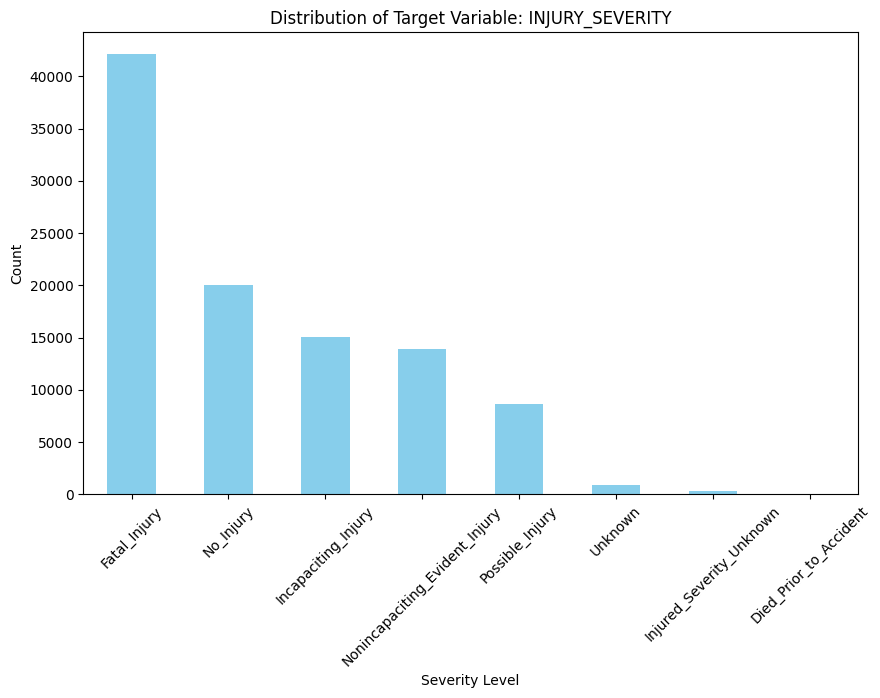

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
data['INJURY_SEVERITY'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable: INJURY_SEVERITY')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

---
<u>Correlation Matrix and Heatmap for Numerical Features<u>
---
The code computes the correlation matrix for numerical columns in the dataset and visualizes it as a heatmap to show the relationships between the numerical features.

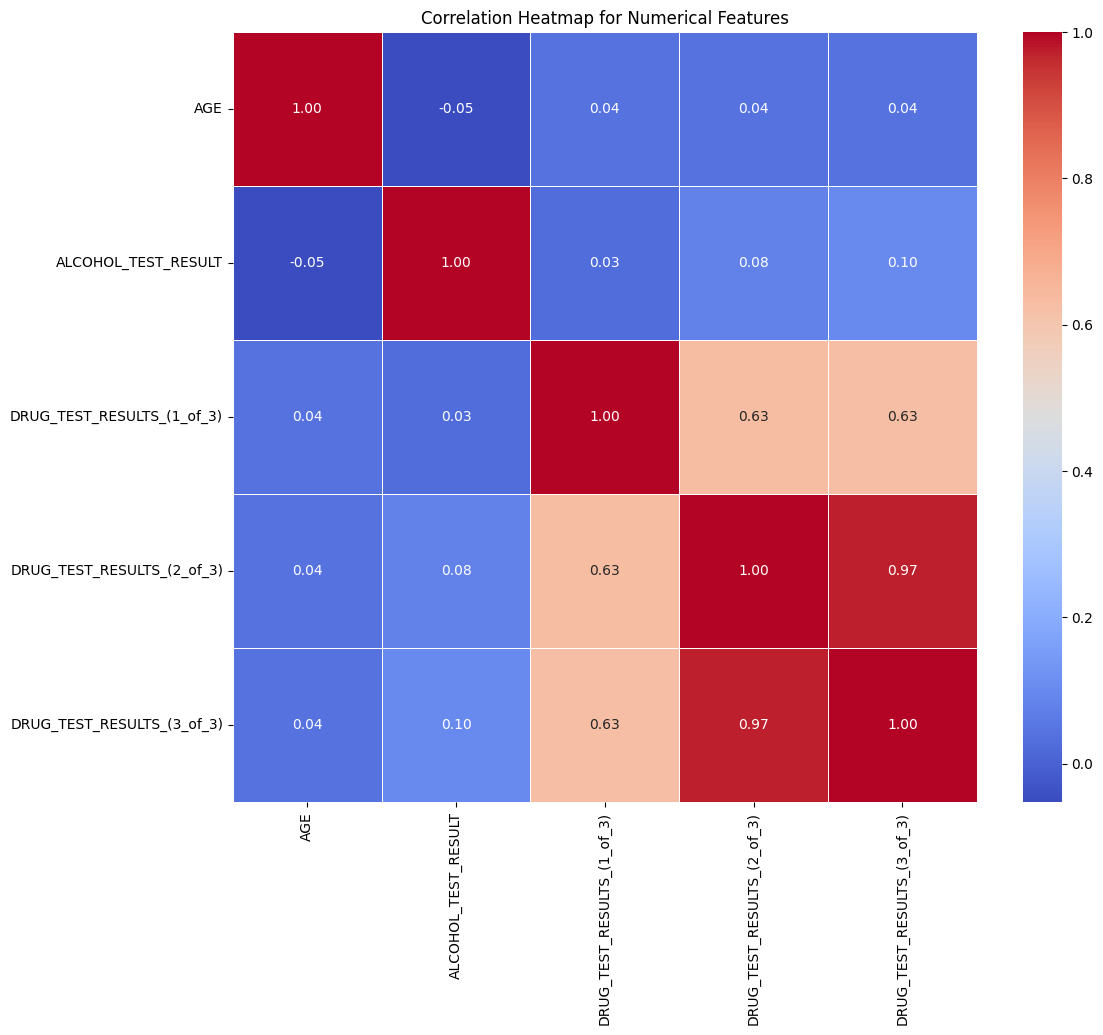

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (int64 and float64 types)
numerical_columns = data.select_dtypes(['int64', 'float64']).columns

# Generate summary statistics for the numerical columns (optional)
numerical_summary = data[numerical_columns].describe()

# Calculate the correlation matrix for the numerical features
correlation_matrix = data[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap for Numerical Features')

# Display the heatmap
plt.show()

---

<u>Data Preprocessing<u>
--

This code finds and displays the columns in the dataset that contain missing values, along with the count of missing entries for each column.

In [65]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

The dataset does not contain any missing values. 

---
<u>Data Normalization<u>
--

The numeric columns in the dataset have been normalized using Min-Max scaling, where values are now scaled between 0 and 1.

In [66]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
normalized_data = data.copy()
normalized_data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
normalized_data[numeric_columns].head()

,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3)
0,0.343434,0.979798,1.0,0.0,0.0
1,0.202020,0.969697,0.0,0.0,0.0
2,0.434343,0.969697,0.0,0.0,0.0
3,0.383838,0.969697,0.0,0.0,0.0
4,0.505051,0.979798,1.0,0.0,0.0


---
<u>Feature selection before splitting data<u>
--

The below code uses the `SelectKBest` method from scikit-learn to select the top 5 features that have the highest relationship with the target variable, **INJURY_SEVERITY**, using the **f_classif** scoring function. It first encodes the target variable and then applies feature selection on the numerical columns of the dataset, returning the names of the top 5 selected features.

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
target_encoded = LabelEncoder().fit_transform(normalized_data['INJURY_SEVERITY'])
features = normalized_data[numeric_columns].drop(columns=['INJURY_SEVERITY'], errors='ignore')
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
selected_features = selector.fit_transform(features, target_encoded)
selected_feature_names = features.columns[selector.get_support()]
selected_feature_names

Index(['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)'],
      dtype='object')

The top five features selected for modeling based on their relationship with **INJURY_SEVERITY** are **AGE**, **ALCOHOL_TEST_RESULT**, and three drug test results: **DRUG_TEST_RESULTS_(1_of_3)**, **DRUG_TEST_RESULTS_(2_of_3)**, and **DRUG_TEST_RESULTS_(3_of_3)**. These features are important in understanding how age, alcohol, and drugs affect injury severity. Together, they provide valuable information for predicting the severity of injuries.

---
<u>Split data into training and testing<u>
--

The below code splits the dataset into training and testing sets using the selected features (`X`) and the encoded target variable (`y`), with **80% of the data used for training and 20% for testing**. It then outputs the shapes of the resulting training and testing datasets for both features and target variables.

In [68]:
from sklearn.model_selection import train_test_split
X = normalized_data[selected_feature_names]
y = target_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((80774, 5), (20194, 5), (80774,), (20194,))

The data has been successfully divided into two sets: the **training set** contains **80,774 samples** with **5 features**, while the **testing set** includes **20,194 samples** with **5 features**. This split allows the model to learn from the larger training set and be evaluated on the smaller testing set.

---
<u>KNN Model Design<u>
--

The below code defines a K-Nearest Neighbors (KNN) model and creates a hyperparameter grid with different values for the number of neighbors, weighting function, and distance metric to be used during training.

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

---
<u>KNN Hyperparameter Tuning<u>
--

This code performs a grid search with cross-validation using the `GridSearchCV` function, testing different hyperparameters for the KNN model on the training data. It then retrieves and displays the best hyperparameters and the highest accuracy score achieved during the grid search.

In [70]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

({'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'},
 np.float64(0.43886641217556777))

The KNN model has been set up and optimized, with the best hyperparameters identified as follows: the distance metric is **Manhattan**, the number of neighbors is **9**, and the weighting function is **uniform**.

---
<u>Decision Tree Model Design<u> 
--

The below code defines a Decision Tree Classifier using `DecisionTreeClassifier` from scikit-learn and sets a random seed for reproducibility. It also creates a hyperparameter grid for tuning the model, including options for the splitting criterion (`criterion`), maximum depth of the tree (`max_depth`), minimum samples required to split a node (`min_samples_split`), and minimum samples required at a leaf node (`min_samples_leaf`).

In [71]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5]  
}

---
<u>Decision Tree Hyperparameter Tuning<u>
--

The below code performs a grid search with cross-validation using `GridSearchCV` to find the best hyperparameters for the Decision Tree model based on accuracy. It then fits the model to the training data and retrieves the best hyperparameters and the highest accuracy score achieved during the grid search.

In [72]:
from sklearn.model_selection import GridSearchCV
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
best_params_dt, best_score_dt

({'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2},
 np.float64(0.47806222658751063))

The Decision Tree model has been set up and optimized, with the best hyperparameters identified as follows: the splitting **criterion is entropy**, the **maximum depth of the tree is 10**, the **minimum number of samples required at a leaf node is 5**, and the **minimum number of samples required to split a node is 2**.

---
<u>Comparison of the KNN and Decision Tree models<u>
--

The KNN model was optimized with the best parameters being metric: Manhattan, n_neighbors: 9, and weights: uniform, achieving a cross-validation accuracy of approximately 44.09%. On the other hand, the Decision Tree model was optimized with the best parameters being criterion: entropy, max_depth: 10, min_samples_leaf: 5, and min_samples_split: 2, achieving a slightly higher cross-validation accuracy of around 47.81%. While both models have shown promising results, the Decision Tree outperformed the KNN model by a small margin

---
<u>Observations<u>
--
The KNN model was optimized with the best parameters being metric: Manhattan, n_neighbors: 9, and weights: uniform, achieving a cross-validation accuracy of approximately 44.09%. On the other hand, the Decision Tree model was optimized with the best parameters being criterion: entropy, max_depth: 10, min_samples_leaf: 5, and min_samples_split: 2, achieving a slightly higher cross-validation accuracy of around 47.81%. While both models have shown promising results, the Decision Tree outperformed the KNN model by a small margin.

---
<u>Evaluate models on the test dataset<u>
--

In [73]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, y_pred_knn)
knn_classification_report = classification_report(y_test, y_pred_knn, zero_division=0)
print("Unique KNN Predictions:", np.unique(y_pred_knn))
decision_tree_best = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
decision_tree_best.fit(X_train, y_train)
y_pred_dt = decision_tree_best.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
dt_classification_report = classification_report(y_test, y_pred_dt, zero_division=0)
print("Unique Decision Tree Predictions:", np.unique(y_pred_dt))
evaluation_results = {
    "KNN Test Accuracy": knn_test_accuracy,
    "KNN Classification Report": knn_classification_report,
    "Decision Tree Test Accuracy": dt_test_accuracy,
    "Decision Tree Classification Report": dt_classification_report
}
evaluation_results

Unique KNN Predictions: [1 2 4 5 6 7]
Unique Decision Tree Predictions: [1 2 4 5 6 7]


{'KNN Test Accuracy': 0.43824898484698427,
 'KNN Classification Report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         2\n           1       0.57      0.80      0.67      8473\n           2       0.22      0.14      0.17      3061\n           3       0.00      0.00      0.00        79\n           4       0.28      0.26      0.27      3989\n           5       0.21      0.15      0.17      2743\n           6       0.15      0.03      0.06      1673\n           7       0.24      0.59      0.34       174\n\n    accuracy                           0.44     20194\n   macro avg       0.21      0.25      0.21     20194\nweighted avg       0.37      0.44      0.39     20194\n',
 'Decision Tree Test Accuracy': 0.48172724571654946,
 'Decision Tree Classification Report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         2\n           1       0.65      0.80      0.72      8473

The KNN model achieved a test accuracy of approximately **44.48%**, with precision, recall, and F1-scores varying across different classes, and some classes not being predicted at all. The Decision Tree model performed slightly better, with a test accuracy of around **48.17%**. It generally showed better precision, recall, and F1-scores than the KNN model, especially for more frequent classes, but still struggled with less frequent classes.

---
<u>Summary<u>
--
The Decision Tree model outperforms the KNN model on the test dataset, with higher accuracy and better overall classification results. However, both models have difficulty predicting rare classes, as shown in their classification reports. The Decision Tree performs better overall, particularly for more common classes, while the KNN model shows more variation in its predictions. Still, both models could be improved in predicting less frequent classes.

---
<u>Precision Score Comparison by Class<u>
--

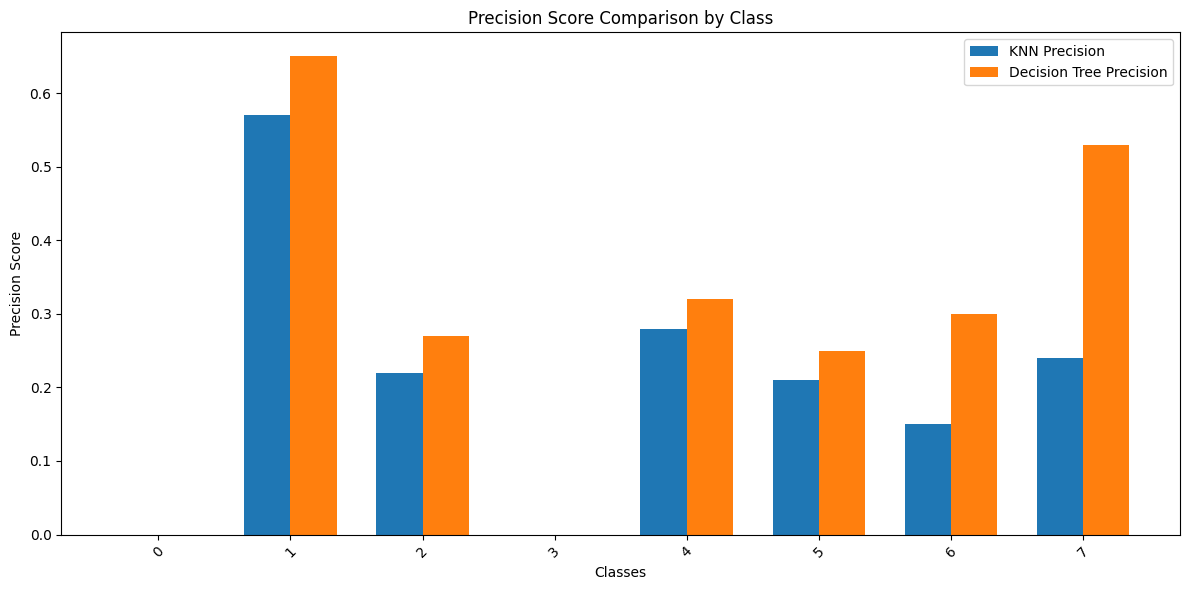

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
def parse_classification_report(report):
    lines = report.strip().split("\n")
    data = []
    for line in lines[2:-3]:
        row = line.split()
        if len(row) == 5:
            data.append([row[0], float(row[1]), float(row[2]), float(row[3])]) 
    return np.array(data)
knn_metrics = parse_classification_report(evaluation_results["KNN Classification Report"])
dt_metrics = parse_classification_report(evaluation_results["Decision Tree Classification Report"])
labels = knn_metrics[:, 0]
x = np.arange(len(labels)) 
width = 0.35 
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, knn_metrics[:, 1].astype(float), width, label='KNN Precision')
ax.bar(x + width/2, dt_metrics[:, 1].astype(float), width, label='Decision Tree Precision')
ax.set_xlabel('Classes')
ax.set_ylabel('Precision Score')
ax.set_title('Precision Score Comparison by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

The chart compares the precision scores for each class between the KNN and Decision Tree models. The Decision Tree model (represented by orange bars) generally performs better than the KNN model (represented by blue bars), particularly for classes 4, 5, and 6, where the precision score is higher. However, for class 0, both models show similar precision scores. Overall, the Decision Tree model demonstrates stronger precision across most classes.

---
---